In [ ]:
!gdown 139zPupUlsIsMhmE_qdrvByK9tZkKiFSL
!gdown 1zLt68-zGz8aEBwHLrOVqT78JWUH8opee
!gdown 1pMvDMb8JOwR8nmDTyb58jMf892UD9A4p
!gdown 1TZHMR-OEFWG4uWsUSk4tYimqIm4-_Hgz
!gdown 1BwJAeUTsyn_1TgW8Cy26jgrCqZ8jI0m2

Downloading...
From: https://drive.google.com/uc?id=139zPupUlsIsMhmE_qdrvByK9tZkKiFSL
To: /content/features.png
100% 989k/989k [00:00<00:00, 15.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLt68-zGz8aEBwHLrOVqT78JWUH8opee
To: /content/gdp_log_diff2.png
100% 61.0k/61.0k [00:00<00:00, 74.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pMvDMb8JOwR8nmDTyb58jMf892UD9A4p
To: /content/gdp.png
100% 35.2k/35.2k [00:00<00:00, 51.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TZHMR-OEFWG4uWsUSk4tYimqIm4-_Hgz
To: /content/VAR future_forecast.png
100% 57.1k/57.1k [00:00<00:00, 50.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BwJAeUTsyn_1TgW8Cy26jgrCqZ8jI0m2
To: /content/News Sentiment.png
100% 549k/549k [00:00<00:00, 94.7MB/s]


In [ ]:
!pip install -U langchain langchain_community langchain_openai
!pip install transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [ ]:
import glob
png_files = glob.glob("/content/*.png")
png_files

['/content/gdp.png',
 '/content/gdp_log_diff2.png',
 '/content/News Sentiment.png',
 '/content/features.png',
 '/content/VAR future_forecast.png']

In [ ]:
import base64

base64_images = {}
for png_file in png_files:
    with open(png_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        base64_images[png_file] = encoded_string


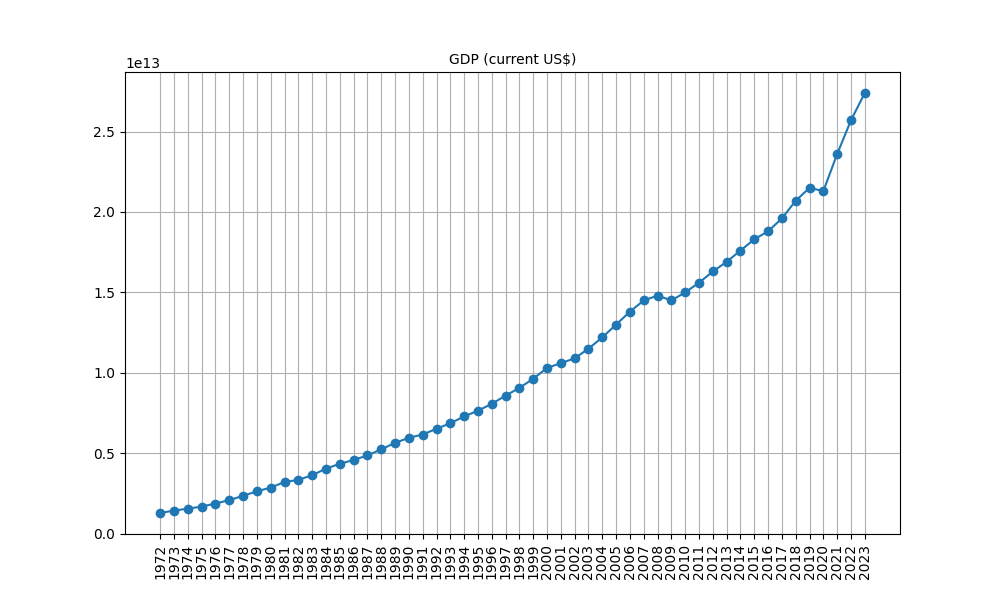


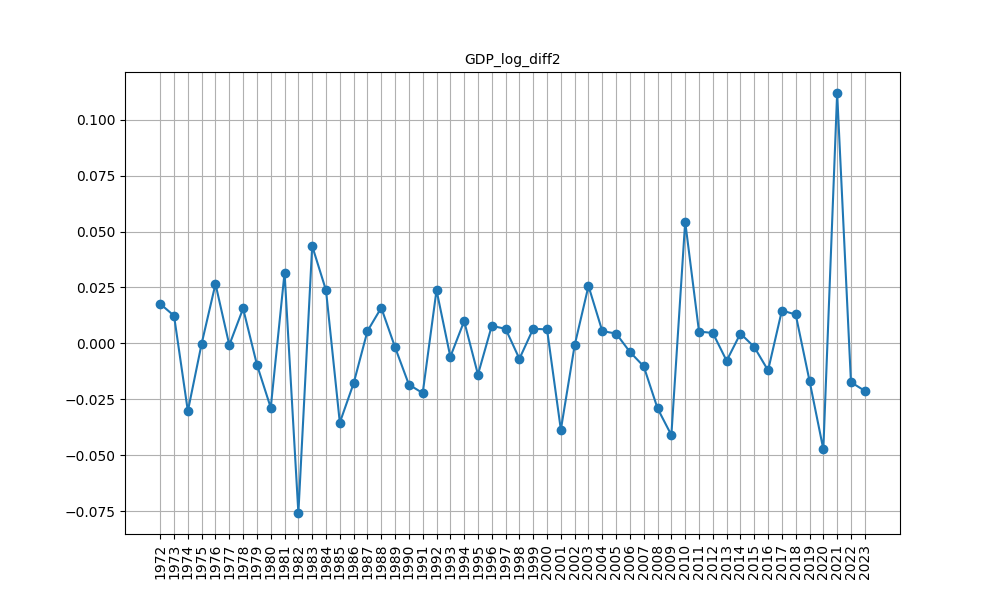


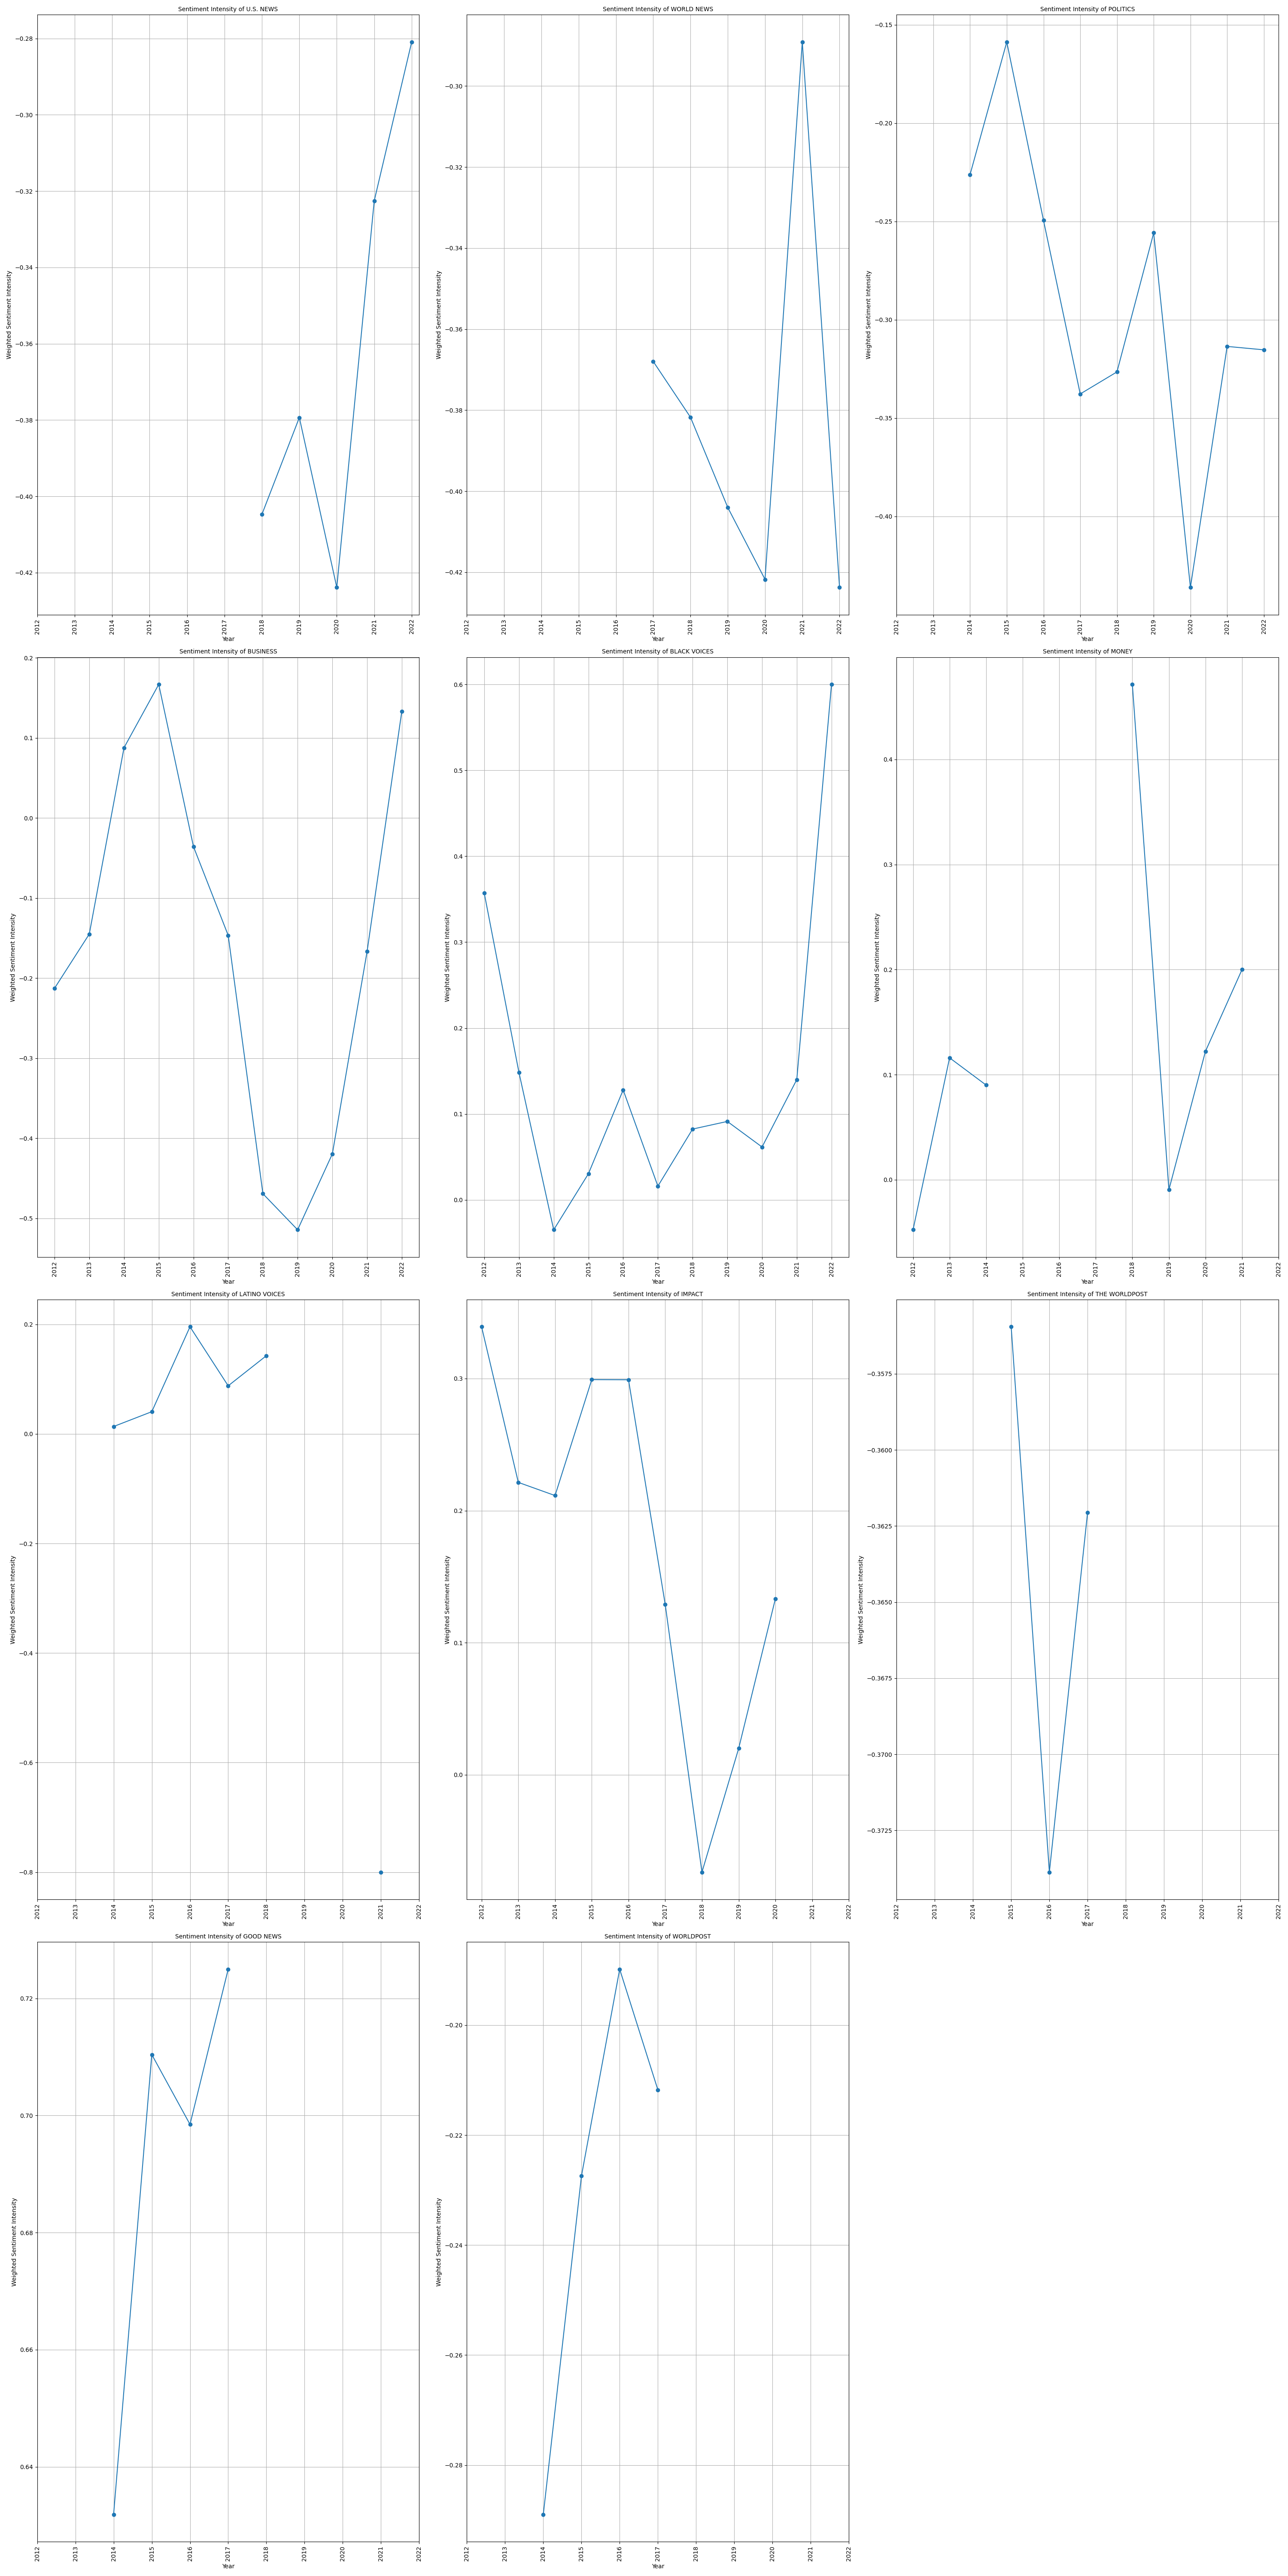


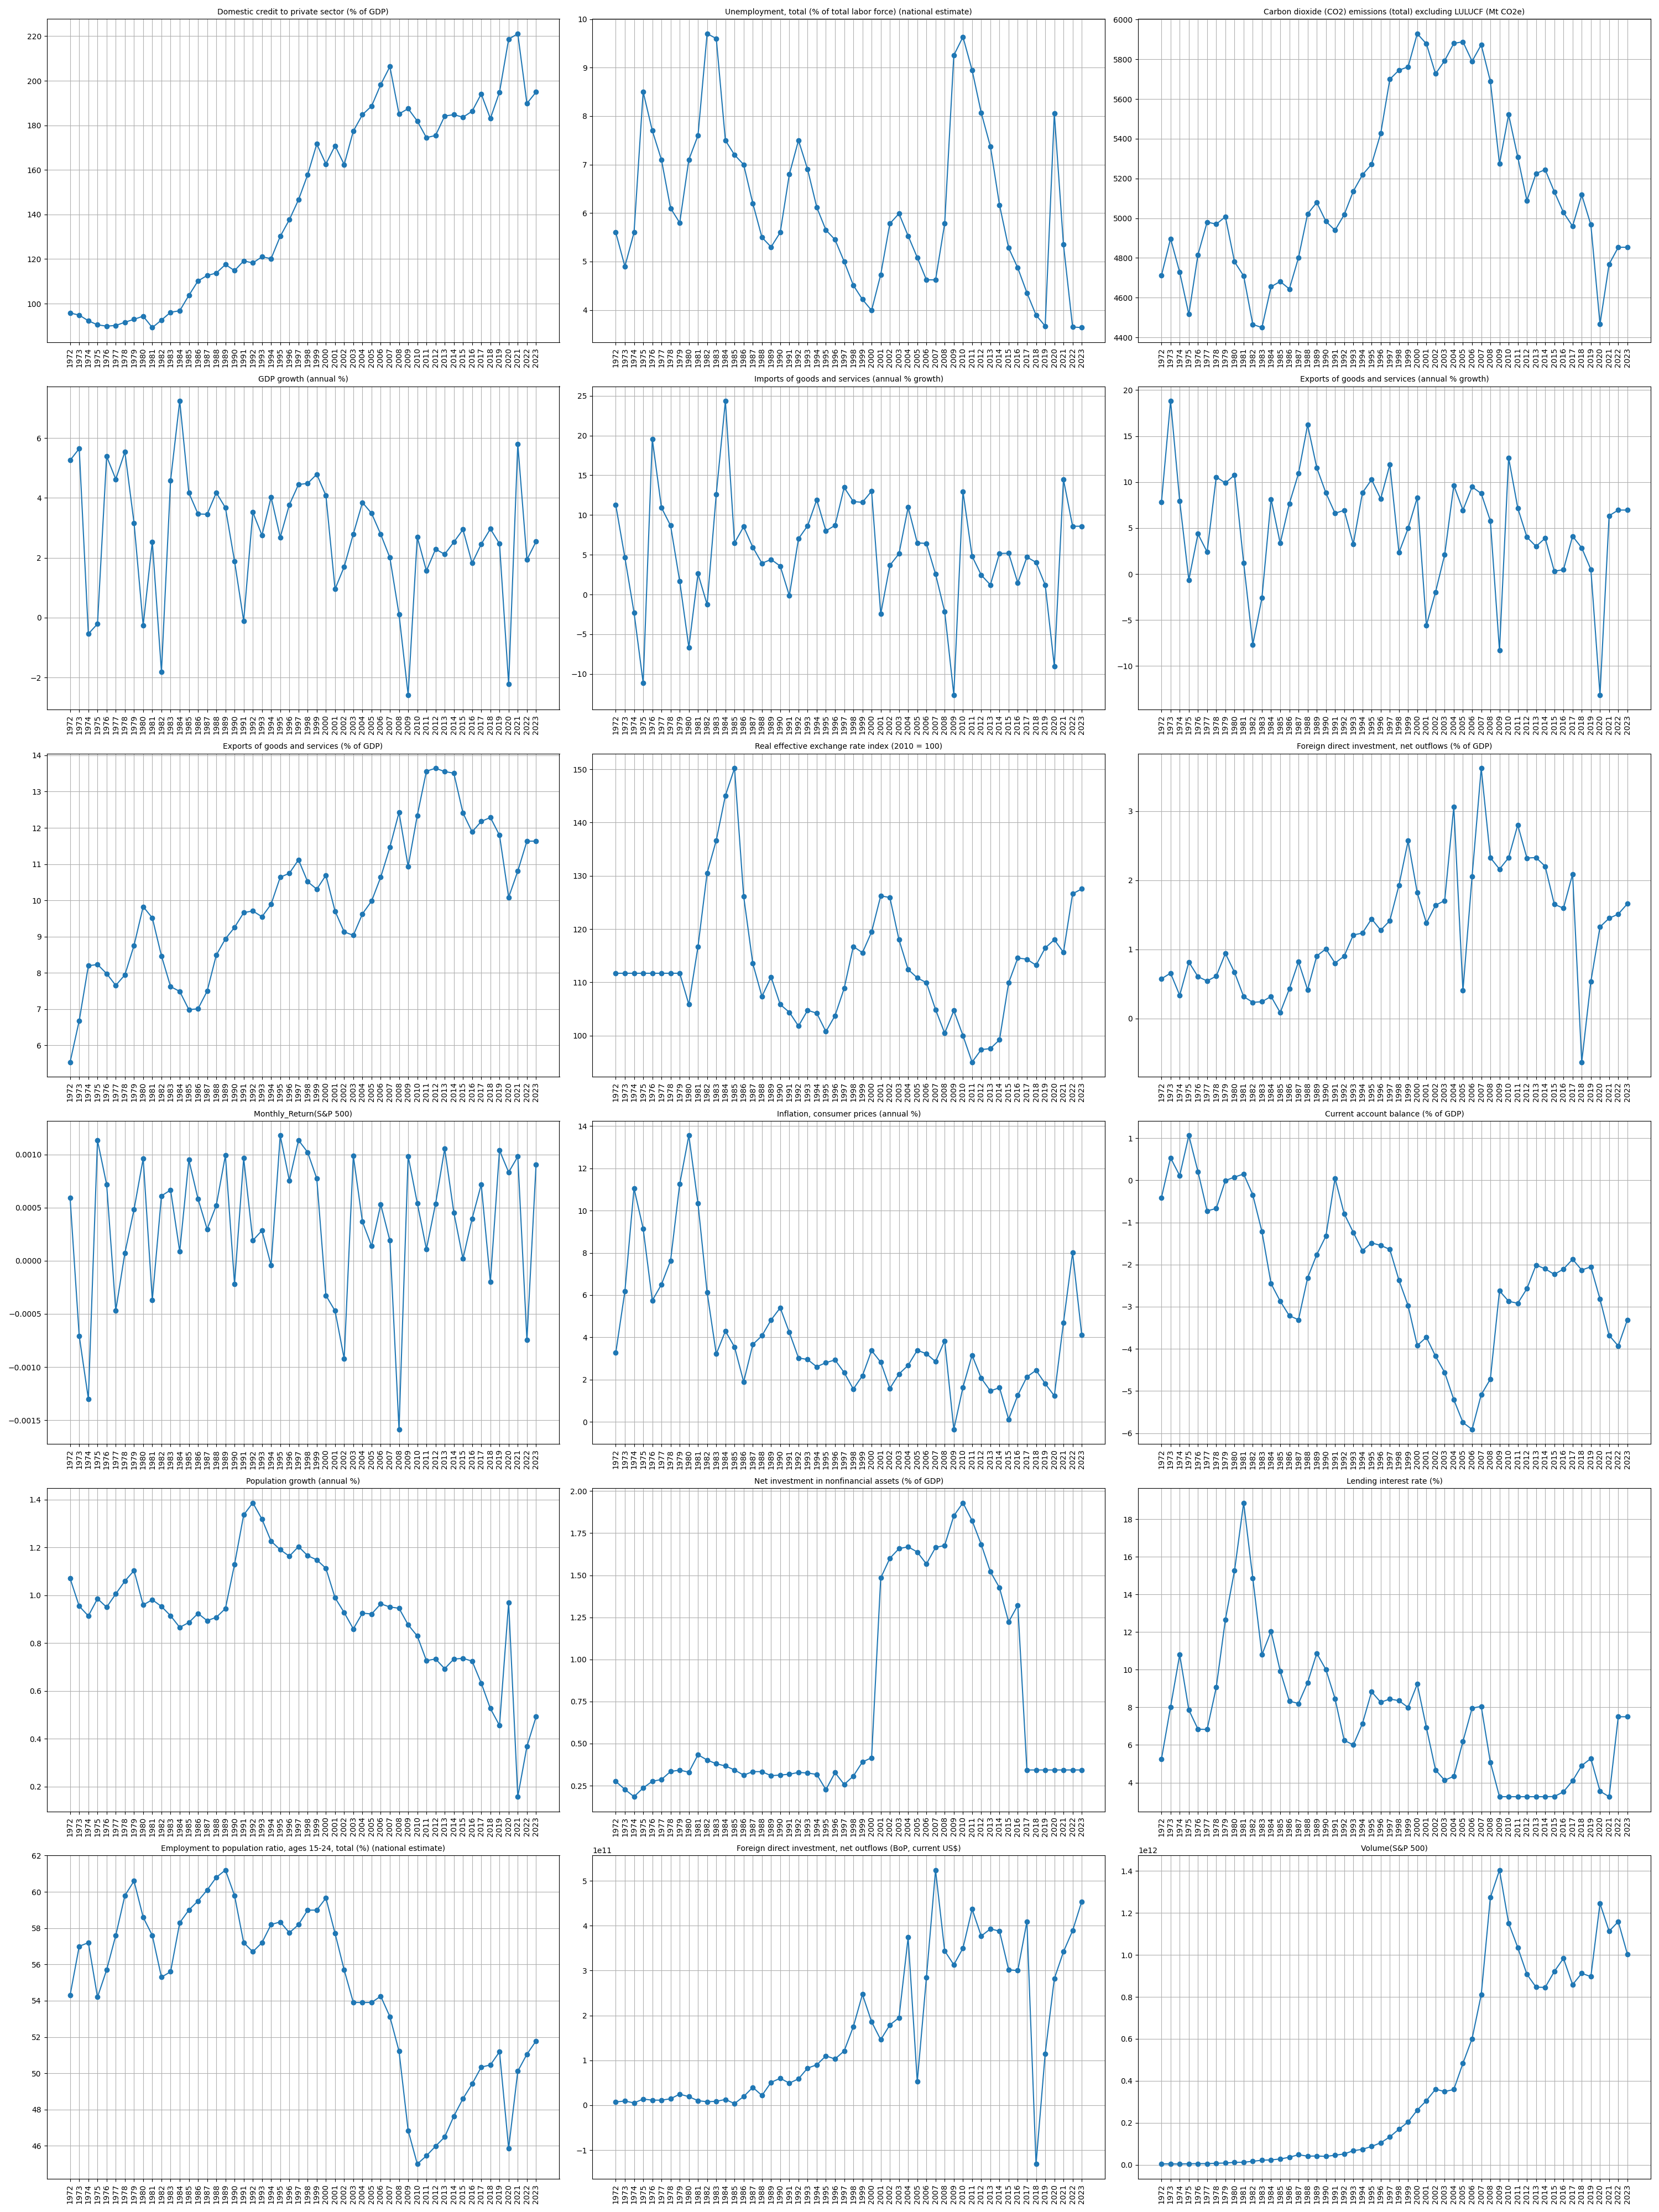


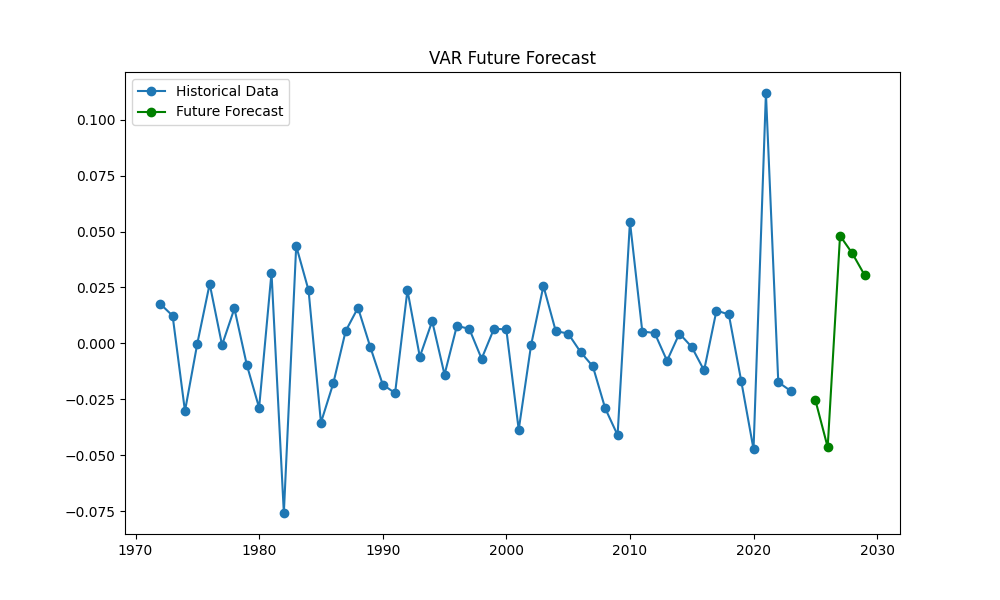

In [ ]:
from IPython.display import HTML

for png_file, encoded_string in base64_images.items():
  display(HTML(f'<img src="data:image/png;base64,{encoded_string}">'))

In [ ]:
base64_images.keys()

dict_keys(['/content/gdp.png', '/content/gdp_log_diff2.png', '/content/News Sentiment.png', '/content/features.png', '/content/VAR future_forecast.png'])

In [ ]:
GDP_LOG_DIFF2 = base64_images['/content/gdp_log_diff2.png']
VAR_FUTURE_FORECAST = base64_images['/content/VAR future_forecast.png']
GDP_TREND = base64_images['/content/gdp.png']
ECONOMIC_INDICATOR_IMAGES = base64_images['/content/features.png']
NEWS_SENTIMENT = base64_images['/content/News Sentiment.png']

In [ ]:
from langchain_openai import ChatOpenAI
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

# Add your API Key when using LLM.
api_key = ''
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7, api_key=api_key)



In [ ]:
from langchain.schema import HumanMessage

message_prompt = [
    HumanMessage(
        content=[
            {"type": "text",
                "text": f"""
                Analyze the visualizations of the following five images:
                1. The actual GDP trend
                2. The GDP trend with log transformation applied following with the first and second differencing
                3. The plots of top economic indicators that impact GDP (current US$) in a single image.
                4. The VAR forecast past and future predictions with the economic indicators as features.
                5. The plots of various new sentiment intensities over the years and also the average sentiment intensity of various categories


                Describe all the plots in detail. In the following format:
                Description of plot 1 (with name):
                Description of plot 2 (with name):
                Description of plot 3 (with name):
                Description of plot 4 (with name):
                Description of plot 5 (with name):
                """
            },
            {"type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{GDP_TREND}"}
            },
            {"type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{GDP_LOG_DIFF2}"}
            },
            {"type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{ECONOMIC_INDICATOR_IMAGES}"}
            },
            {"type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{VAR_FUTURE_FORECAST}"}
            },
            {"type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{NEWS_SENTIMENT}"}
            }
        ]
    )
]
response = llm.invoke(message_prompt)

In [ ]:
response.content.split('\n')

["Here's a detailed description of each plot based on the provided images:",
 '',
 '**Description of plot 1 (Actual GDP Trend):**  ',
 'This plot displays the Gross Domestic Product (GDP) over time, measured in current US dollars. The x-axis represents the years from approximately 1972 to 2023, while the y-axis indicates GDP values ranging from 0 to over 2.5 trillion USD. The data points are connected by a line, showing a generally upward trend in GDP, with some fluctuations. The growth appears exponential, especially in recent years, indicating significant economic growth or recovery.',
 '',
 '**Description of plot 2 (GDP Trend with Log Transformation and Differencing):**  ',
 'This plot illustrates the second differencing of the logarithm of GDP. The x-axis spans the same time range as the first plot, while the y-axis shows the transformed and differenced values. The plot fluctuates around zero, indicating the growth rate of GDP over time, with periods of increases and decreases. The

In [ ]:
from langchain.schema import HumanMessage
def generate_message_prompt(text):
    message_prompt = [
        HumanMessage(
            content=[
                {"type": "text",
                    "text": f"""
                    Analyze the visualizations of the following five images:
                    1. The actual GDP trend
                    2. The GDP trend with log transformation applied following with the first and second differencing
                    3. The plots of top economic indicators that impact GDP (current US$) in a single image.
                    4. The VAR forecast past and future predictions with the economic indicators as features.
                    5. The plots of various new sentiment intensities over the years and also the average sentiment intensity of various categories


                    Answer the following questions based on the plots.
                    Question: {text}
                    Answer: (your response here...)
                    """
                },
                {"type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{GDP_TREND}"}
                },
                {"type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{GDP_LOG_DIFF2}"}
                },
                {"type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{ECONOMIC_INDICATOR_IMAGES}"}
                },
                {"type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{VAR_FUTURE_FORECAST}"}
                },
                {"type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{NEWS_SENTIMENT}"}
                }
            ]
        )
    ]
    return message_prompt


In [ ]:
question = """What is the actual GDP value in the year 2017.
What are the key factors that affected gdp rate(increase or decrease from the previous year) and what categories of news impacted the gdp rate?"
message = generate_message_prompt(question)

In [ ]:
respone = llm.invoke(message)

In [ ]:
respone.content.split("\n")

["Based on the visualizations provided, here's the analysis:",
 '',
 '**Actual GDP Value in 2017:**',
 'The actual GDP value in 2017 is approximately $19.5 trillion (1.95e13 in current US$).',
 '',
 '**Key Factors Affecting GDP Rate (2016-2017):**',
 '1. **Economic Indicators:**',
 '   - **Consumer Confidence Index:** A rise in consumer confidence could indicate increased spending, contributing to GDP growth.',
 '   - **Unemployment Rate:** A decrease in unemployment typically correlates with increased economic activity, thus positively impacting GDP.',
 '   - **Inflation Rates:** Moderate inflation can stimulate spending; however, high inflation may detract from GDP growth.',
 '',
 '2. **Global Economic Conditions:**',
 '   - International trade agreements, geopolitical stability, and global market trends can significantly impact GDP.',
 '',
 '3. **Government Policy:**',
 '   - Fiscal policies, including government spending and tax changes, can directly influence economic growth.',
 '

In [ ]:
question = """What will be the change in GDP rate and what factors can affect GDP rate in the year 2025 based on VAR forecast.
What news can change the GDP rate and how it can change other economic indicators?"""
message = generate_message_prompt(question)
response = llm.invoke(message)

In [ ]:
response.content.split("\n")

['Based on the visualizations provided and the VAR forecast analysis, the expected change in GDP rate for the year 2025 can be summarized as follows:',
 '',
 '### Expected Change in GDP Rate',
 '1. **Forecasted Trend**: The VAR model predicts potential fluctuations in GDP growth rates. The historical GDP growth rates show variability, and the forecast for 2025 suggests a continuation of these fluctuations, with some periods of growth followed by potential declines.',
 '',
 '### Factors Affecting GDP Rate in 2025',
 '1. **Economic Indicators**: The plots of various economic indicators (e.g., inflation rates, unemployment rates, consumer spending) provide insights into factors that could significantly influence GDP. A strong correlation between these indicators and GDP suggests that:',
 '   - **Unemployment Rate**: A decreasing unemployment rate typically correlates with GDP growth, as more people employed can lead to higher consumer spending.',
 '   - **Inflation Rates**: Moderate infla

In [ ]:
question = input()
message = generate_message_prompt(question)
response = llm.invoke(message)
response.content.split("\n")

What's the GDP in the year 2021 and explain in detail what effected GDP rate?


['To determine the GDP for the year 2021 and the factors affecting the GDP rate, we can analyze the provided visualizations.',
 '',
 '### GDP in 2021',
 'From the first image, which shows the actual GDP trend, we can see that the GDP in 2021 is approximately **$22.7 trillion** in current US dollars.',
 '',
 '### Factors Affecting GDP Rate in 2021',
 'Several factors likely influenced the GDP rate in 2021:',
 '',
 '1. **Pandemic Recovery**: The global economy was in recovery mode from the COVID-19 pandemic, which had significantly impacted economic activities in 2020. The easing of restrictions and reopening of businesses likely contributed to an uptick in GDP as consumer spending resumed.',
 '',
 '2. **Government Stimulus**: The implementation of government stimulus packages in numerous countries, including the US, played a crucial role in boosting economic activity. Direct payments to individuals and support for businesses helped stimulate consumer spending and investment.',
 '',
 '3.